#Project:Etherium price prediction

##Abstract:
In this notebook, we develop and evaluate AI models for predicting Ether prices.

Using the publicly available [historical data (ether)](https://finance.yahoo.com/quote/ETH-USD/history/) Yahoo! finance. we explore various data preprocessing techniques and feature engineering methods tailored to the specific characteristics of price prediction. We then build and evaluate a multi step LSTM model.


#Imports

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization

In [ ]:
import pandas as pd
from google.colab import drive
#drive.mount('/content/drive')

#Data preprocessing


In [ ]:
file_path = '/content/drive/MyDrive/odessey_hackathon/DataSet/Eth-USD-2017-2025.csv'

In [ ]:
df = pd.read_csv(file_path)

In [ ]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,"Feb 11, 2025","2,661.49","2,723.29","2,588.02","2,613.95","2,613.95","19,164,399,616"
1,"Feb 10, 2025","2,628.65","2,692.81","2,564.02","2,661.17","2,661.17","19,414,208,113"
2,"Feb 9, 2025","2,632.58","2,695.22","2,530.44","2,628.72","2,628.72","17,517,088,276"
3,"Feb 8, 2025","2,623.00","2,665.48","2,591.78","2,632.31","2,632.31","17,059,263,074"
4,"Feb 7, 2025","2,688.90","2,798.03","2,564.97","2,622.21","2,622.21","29,526,663,418"
5,"Feb 6, 2025","2,787.66","2,857.14","2,662.45","2,688.40","2,688.40","29,500,645,692"
6,"Feb 5, 2025","2,735.23","2,824.40","2,701.10","2,787.78","2,787.78","31,960,764,447"
7,"Feb 4, 2025","2,883.82","2,888.25","2,636.17","2,735.05","2,735.05","48,795,275,985"
8,"Feb 3, 2025","2,868.08","2,919.48","2,159.28","2,884.57","2,884.57","92,453,553,253"
9,"Feb 2, 2025","3,118.61","3,161.89","2,755.47","2,868.69","2,868.69","42,060,930,305"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2652 entries, 0 to 2651
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       2652 non-null   object
 1   Open       2652 non-null   object
 2   High       2652 non-null   object
 3   Low        2652 non-null   object
 4   Close      2652 non-null   object
 5   Adj Close  2652 non-null   object
 6   Volume     2652 non-null   object
dtypes: object(7)
memory usage: 145.2+ KB


In [ ]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,2652,2652,2652,2652,2652,2652,2652
unique,2652,2632,2627,2629,2630,2630,2652
top,"Feb 11, 2025",107.63,229.86,116.09,199.19,199.19,"19,164,399,616"
freq,1,2,3,2,2,2,1


In [ ]:
 df.isnull().sum()


,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [ ]:
df.shape

(2652, 7)

In [ ]:
cols_to_fix = ["Open", "High", "Low", "Close", "Adj Close", "Volume"]
for col in cols_to_fix:
    df[col] = df[col].replace(",", "", regex=True)  # Remove commas
    df[col] = df[col].replace({"": np.nan, " ": np.nan})  # Ensure NaNs
    df[col] = df[col].astype(float)  # Convert to float after replacing NaNs

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2652 entries, 0 to 2651
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2652 non-null   object 
 1   Open       2652 non-null   float64
 2   High       2652 non-null   float64
 3   Low        2652 non-null   float64
 4   Close      2652 non-null   float64
 5   Adj Close  2651 non-null   float64
 6   Volume     2652 non-null   float64
dtypes: float64(6), object(1)
memory usage: 145.2+ KB


In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,"Feb 11, 2025",2661.49,2723.29,2588.02,2613.95,2613.95,1.916440e+10
1,"Feb 10, 2025",2628.65,2692.81,2564.02,2661.17,2661.17,1.941421e+10
2,"Feb 9, 2025",2632.58,2695.22,2530.44,2628.72,2628.72,1.751709e+10
3,"Feb 8, 2025",2623.00,2665.48,2591.78,2632.31,2632.31,1.705926e+10
4,"Feb 7, 2025",2688.90,2798.03,2564.97,2622.21,2622.21,2.952666e+10


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2651.00000,2651.000000,2651.000000,2651.000000,2651.000000,2.651000e+03
mean,1517.96696,1559.429393,1472.291264,1518.671992,1518.671992,1.326327e+10
std,1235.71622,1268.433167,1198.856306,1235.407748,1235.407748,1.083178e+10
min,84.28000,85.340000,82.830000,84.310000,84.310000,6.217330e+08
25%,273.52000,283.250000,265.470000,274.035000,274.035000,5.672461e+09
50%,1443.84000,1509.990000,1404.020000,1445.380000,1445.380000,1.075863e+10
75%,2465.98500,2546.815000,2392.600000,2467.350000,2467.350000,1.798727e+10
max,4810.07000,4891.700000,4718.040000,4812.090000,4812.090000,9.245355e+10


In [ ]:
 df.isnull().sum()


,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,1
Volume,0


In [ ]:
df = df.dropna()

In [ ]:
df["Date"] = df["Date"].str.replace("nov\.", "Nov", regex=True)
df["Date"] = df["Date"].str.replace("oct\.", "Oct", regex=True)

<ipython-input-7-6dfbe4b6d8b3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Date"] = df["Date"].str.replace("nov\.", "Nov", regex=True)
<ipython-input-7-6dfbe4b6d8b3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Date"] = df["Date"].str.replace("oct\.", "Oct", regex=True)


In [ ]:
df["Date"] = pd.to_datetime(df["Date"], format="%b %d, %Y")

<ipython-input-8-050a9b7c9254>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Date"] = pd.to_datetime(df["Date"], format="%b %d, %Y")


In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2025-02-11,"2,661.49","2,723.29","2,588.02","2,613.95","2,613.95","19,164,399,616"
2025-02-10,"2,628.65","2,692.81","2,564.02","2,661.17","2,661.17","19,414,208,113"
2025-02-09,"2,632.58","2,695.22","2,530.44","2,628.72","2,628.72","17,517,088,276"
2025-02-08,"2,623.00","2,665.48","2,591.78","2,632.31","2,632.31","17,059,263,074"
2025-02-07,"2,688.90","2,798.03","2,564.97","2,622.21","2,622.21","29,526,663,418"


In [ ]:
df = df.sort_values(by="Date").reset_index(drop=True)

In [ ]:
# Set 'Date' as the index (important for time-series analysis)
df.set_index('Date', inplace=True)

In [ ]:
df.to_csv('preprocessed_ethereum_data.csv', index=True)

In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,308.64,329.45,307.06,320.88,320.88,8.932500e+08
2017-11-10,320.67,324.72,294.54,299.25,299.25,8.859860e+08
2017-11-11,298.59,319.45,298.19,314.68,314.68,8.423010e+08
2017-11-12,314.69,319.15,298.51,307.91,307.91,1.613480e+09
2017-11-13,307.02,328.42,307.02,316.72,316.72,1.041890e+09


In [ ]:
df[df.duplicated(keep=False)]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [ ]:
# # Drop duplicates
# df = df.drop_duplicates()

In [ ]:
df[['Close', 'Adj Close']].corr()

,Close,Adj Close
Close,1.0,1.0
Adj Close,1.0,1.0


In [ ]:
df.drop(columns=['Adj Close'], inplace=True)


In [ ]:
df.shape

(2651, 5)

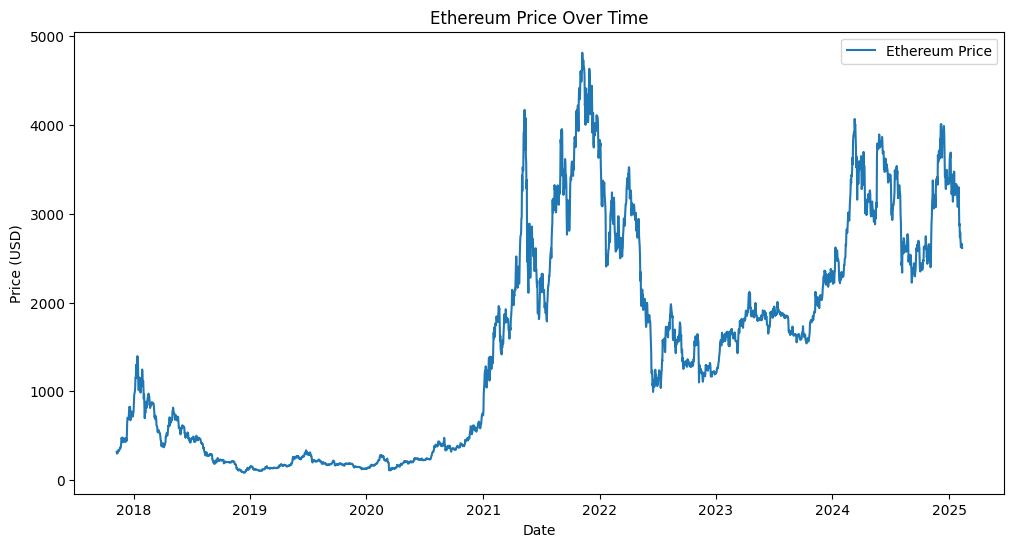

In [ ]:
# Plot Ethereum price over time
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Ethereum Price')
plt.title('Ethereum Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

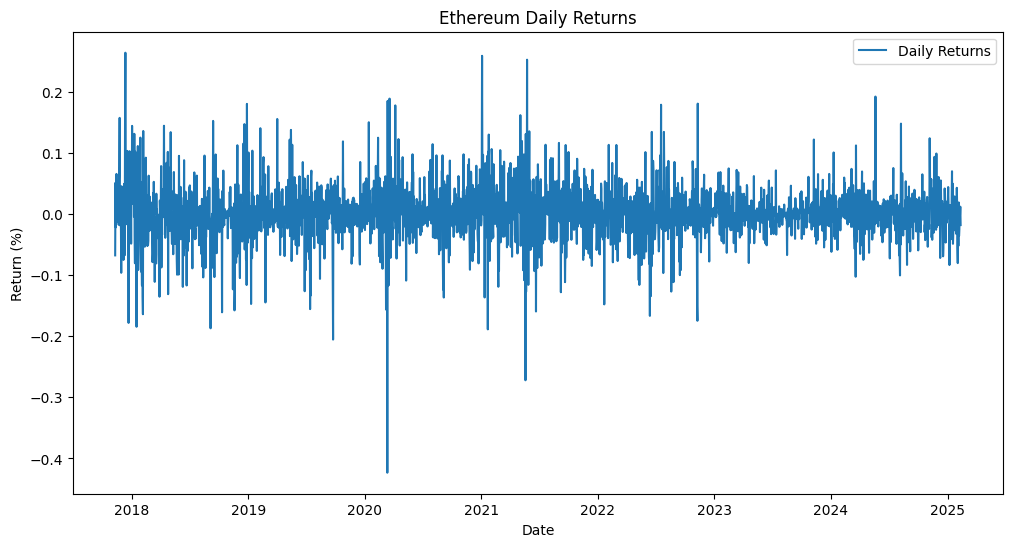

In [ ]:
# Calculate daily returns
df['Daily_Return'] = df['Close'].pct_change()

# Plot daily returns
plt.figure(figsize=(12, 6))
plt.plot(df['Daily_Return'], label='Daily Returns')
plt.title('Ethereum Daily Returns')
plt.xlabel('Date')
plt.ylabel('Return (%)')
plt.legend()
plt.show()

In [ ]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-11-09,308.64,329.45,307.06,320.88,8.932500e+08
2017-11-10,320.67,324.72,294.54,299.25,8.859860e+08
2017-11-11,298.59,319.45,298.19,314.68,8.423010e+08
2017-11-12,314.69,319.15,298.51,307.91,1.613480e+09
2017-11-13,307.02,328.42,307.02,316.72,1.041890e+09


time serie split

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(df):
    train, test = df.iloc[train_index], df.iloc[test_index]

In [ ]:
train.shape

(2210, 5)

In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Daily_Return
Date,,,,,,,
2017-11-09,308.64,329.45,307.06,320.88,320.88,8.932500e+08,NaN
2017-11-10,320.67,324.72,294.54,299.25,299.25,8.859860e+08,-0.067408
2017-11-11,298.59,319.45,298.19,314.68,314.68,8.423010e+08,0.051562
2017-11-12,314.69,319.15,298.51,307.91,307.91,1.613480e+09,-0.021514
2017-11-13,307.02,328.42,307.02,316.72,316.72,1.041890e+09,0.028612


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Scale the data (include all features and the target)
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train)  # Fit scaler on training data
test_scaled = scaler.transform(test)        # Apply scaler to test data

In [ ]:
import numpy as np

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length, :])  # All features (including Price)
        y.append(data[i+seq_length, 3])    # Target is the scaled Price (column 0)
    return np.array(X), np.array(y)

In [ ]:
seq_length = 30  # Use 30 days of data to predict the next day

# Training sequences
X_train, y_train = create_sequences(train_scaled, seq_length)

# Testing sequences
X_test, y_test = create_sequences(test_scaled, seq_length)

In [ ]:
np.isnan(X_train).sum()

0

In [ ]:
# Check for NaN/Inf in the training data
print("NaNs in training data:", np.isnan(X_train).sum())
print("Infs in training data:", np.isinf(X_train).sum())

# Check for NaN/Inf in the test data
print("NaNs in test data:", np.isnan(X_test).sum())
print("Infs in test data:", np.isinf(X_test).sum())

NaNs in training data: 0
Infs in training data: 0
NaNs in test data: 0
Infs in test data: 0


#LSTM Model

model definition

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization

model = Sequential()
model.add(LSTM(32, return_sequences=True, input_shape=(seq_length, X_train.shape[2])))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(LSTM(32))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 30, 32)              │           4,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 30, 32)              │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 30, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 32)                  │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,473 (52.63 KB)

 Trainable params: 13,345 (52.13 KB)

 Non-trainable params: 128 (512.00 B)

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Dropout

# # Initialize the model
# model = Sequential()

# # First LSTM layer
# model.add(LSTM(units=50, return_sequences=True, input_shape=(seq_length, X_train.shape[2])))
# model.add(Dropout(0.2))  # Prevent overfitting

# # Second LSTM layer
# model.add(LSTM(units=50, return_sequences=False))
# model.add(Dropout(0.2))

# # Output layer
# model.add(Dense(units=1))  # Predicts the next day's price

# # Compile the model
# model.compile(optimizer='adam', loss='mean_squared_error')

# model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 30, 50)              │          11,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 30, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,451 (122.86 KB)

 Trainable params: 31,451 (122.86 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping # Import EarlyStopping

history = model.fit(
    X_train, y_train,
    epochs=50,  # Increase epochs
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[EarlyStopping(monitor='val_loss', patience=3)]  # Stop early if no improvement
)

Epoch 1/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0602 - val_loss: 0.0018
Epoch 2/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0523 - val_loss: 0.0016
Epoch 3/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0440 - val_loss: 0.0026
Epoch 4/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0358 - val_loss: 0.0017
Epoch 5/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0312 - val_loss: 0.0017
Epoch 6/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0240 - val_loss: 0.0016
Epoch 7/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0214 - val_loss: 0.0025
Epoch 8/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0161 - val_loss: 0.0037
Epoch 9/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0155 - val_loss: 0.0022
Epoch 10/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0133 - val_loss: 0.0023
Epoch 11/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0114 - val_loss: 0.0029
Epoch 12/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0

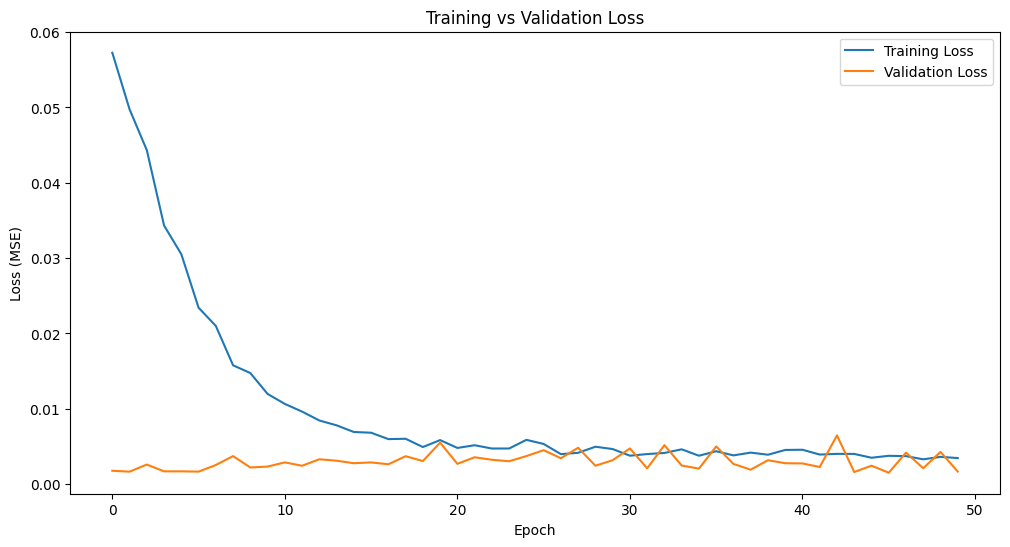

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

In [ ]:
# Predict on test data
y_pred_scaled = model.predict(X_test)
# Predict on test data
y_pred_scaled = model.predict(X_test)

# Inverse-transform the scaled predictions and actual values
y_pred = scaler.inverse_transform(np.concatenate((y_pred_scaled, np.zeros((len(y_pred_scaled), train_scaled.shape[1]-1))), axis=1))[:, 0]
y_true = scaler.inverse_transform(np.concatenate((y_test.reshape(-1,1), np.zeros((len(y_test), train_scaled.shape[1]-1))), axis=1))[:, 0]

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


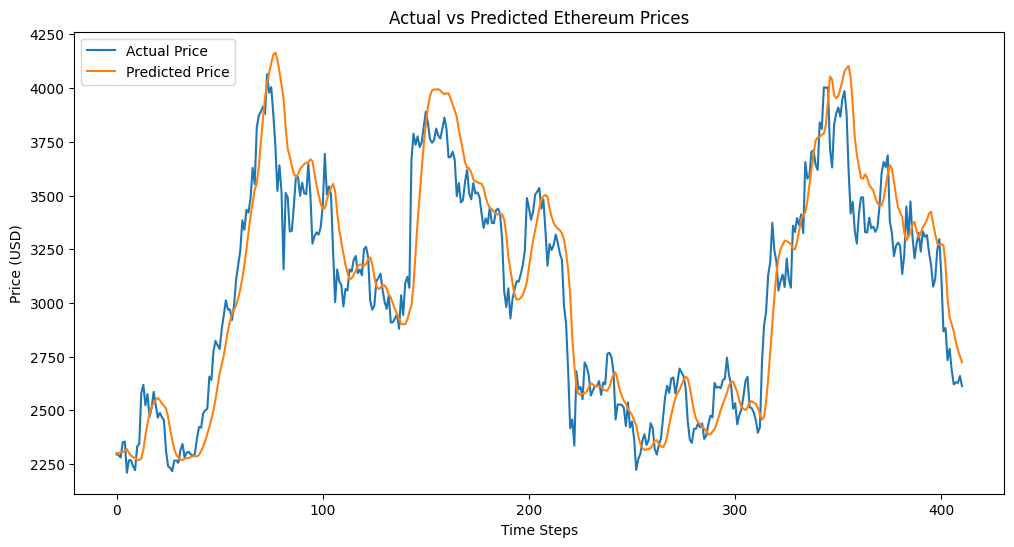

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_true, label='Actual Price')
plt.plot(y_pred, label='Predicted Price')
plt.title('Actual vs Predicted Ethereum Prices')
plt.xlabel('Time Steps')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mse)

print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

MSE: 37004.78
MAE: 143.56
RMSE: 192.37


In [ ]:
# Get the last sequence from the test data
last_sequence = test_scaled[-seq_length:].reshape(1, seq_length, -1)

# Predict the next day's price
future_pred_scaled = model.predict(last_sequence)
# Get the last sequence from the test data
last_sequence = test_scaled[-seq_length:].reshape(1, seq_length, -1)

# Predict the next day's price
future_pred_scaled = model.predict(last_sequence)

# Inverse-transform the prediction
future_pred = scaler.inverse_transform(
    np.concatenate((future_pred_scaled, np.zeros((1, train_scaled.shape[1]-1))), axis=1)
)[:, 0]


# Get the last date from the DataFrame index
last_date = df.index[-1]

# Get the last day's price
last_price = df.loc[last_date, 'Close']

# Print the last day's price and date
print(f"Last Day ({last_date.date()}): Price = ${last_price:.2f}")


next_date = last_date + pd.DateOffset(days=1)  # Calculate the next date
print(f"Predicted Price for Next Day ({next_date.date()}): ${future_pred[0]:.2f}")

print(f"Predicted Price for Next Day: ${future_pred[0]:.2f}")

print(f"Predicted Price for Next Day: ${future_pred[0]:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Last Day (2025-02-11): Price = $2613.95
Predicted Price for Next Day (2025-02-12): $2698.32
Predicted Price for Next Day: $2698.32
Predicted Price for Next Day: $2698.32


In [ ]:
# # Get the last date from the DataFrame index
# last_date = df.index[-1]

# # Get the last day's price (ensure you're accessing a scalar value)
# last_price = df.loc[last_date, 'Close'].iloc[0]  # Use .iloc[0] to get the scalar value

# # Print the last day's price and date
# print(f"Last Day ({last_date.date()}): Price = ${last_price:.2f}")

# next_date = last_date + pd.DateOffset(days=1)  # Calculate the next date
# print(f"Predicted Price for Next Day ({next_date.date()}): ${future_pred[0]:.2f}")


#FacebookProphet Model


In [ ]:
!pip install prophet

from prophet import Prophet
import matplotlib.pyplot as plt

In [ ]:

df = pd.read_csv('/content/drive/MyDrive/odessey_hackathon/DataSet/Eth-USD-2017-2025.csv')


In [ ]:
cols_to_fix = ["Open", "High", "Low", "Close", "Adj Close", "Volume"]
for col in cols_to_fix:
  df[col] = df[col].replace(",", "", regex=True)
  # Replace empty strings with NaN
  df[col] = df[col].replace({"": None, " ": None}, regex=True)
  df[col] = df[col].astype(float)

In [ ]:
df["Date"] = df["Date"].str.replace("nov\.", "Nov", regex=True)
df["Date"] = df["Date"].str.replace("oct\.", "Oct", regex=True)

In [ ]:
df["Date"] = pd.to_datetime(df["Date"], format="%b %d, %Y")

In [ ]:
df = df.sort_values(by="Date").reset_index(drop=True)

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,308.64,329.45,307.06,320.88,320.88,8.932500e+08
1,2017-11-10,320.67,324.72,294.54,299.25,299.25,8.859860e+08
2,2017-11-11,298.59,319.45,298.19,314.68,314.68,8.423010e+08
3,2017-11-12,314.69,319.15,298.51,307.91,307.91,1.613480e+09
4,2017-11-13,307.02,328.42,307.02,316.72,316.72,1.041890e+09


In [ ]:
# # Set 'Date' as the index (important for time-series analysis)
# df.set_index('Date', inplace=True)

In [ ]:
df_prophet = df[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

In [ ]:
df_prophet.dropna(subset=['ds'], inplace=True)

In [ ]:
df_prophet['ds'].isnull().sum()

0

In [ ]:
# Split into training (80%) and testing (20%)
train_size = int(len(df_prophet) * 0.8)
train = df_prophet.iloc[:train_size]
test = df_prophet.iloc[train_size:]

print(f"Training data: {train['ds'].min()} to {train['ds'].max()}")
print(f"Test data: {test['ds'].min()} to {test['ds'].max()}")

Training data: 2017-11-09 00:00:00 to 2023-08-30 00:00:00
Test data: 2023-08-31 00:00:00 to 2025-02-11 00:00:00


In [ ]:
# Initialize Prophet with customizable parameters
model = Prophet(
    # yearly_seasonality=True,    # Enable yearly seasonality
    # weekly_seasonality=True,    # Enable weekly seasonality
    daily_seasonality=True,    # Disable daily seasonality (for daily data)
    changepoint_prior_scale=0.05,  # Control trend flexibility (prevents overfitting)
    seasonality_mode='additive' # Additive seasonality (default)
)

# Optional: Add built-in holidays (e.g., US holidays)
# model.add_country_holidays(country_name='US')

model.add_seasonality(
    name='monthly',
    period=30.5,   # Monthly seasonality (~30.5 days)
    fourier_order=5  # Flexibility (higher = more complex)
)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpravfu91_/ifppyg16.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpravfu91_/gqje_b50.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85006', 'data', 'file=/tmp/tmpravfu91_/ifppyg16.json', 'init=/tmp/tmpravfu91_/gqje_b50.json', 'output', 'file=/tmp/tmpravfu91_/prophet_model034k1sit/prophet_model-20250212192442.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:24:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:24:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


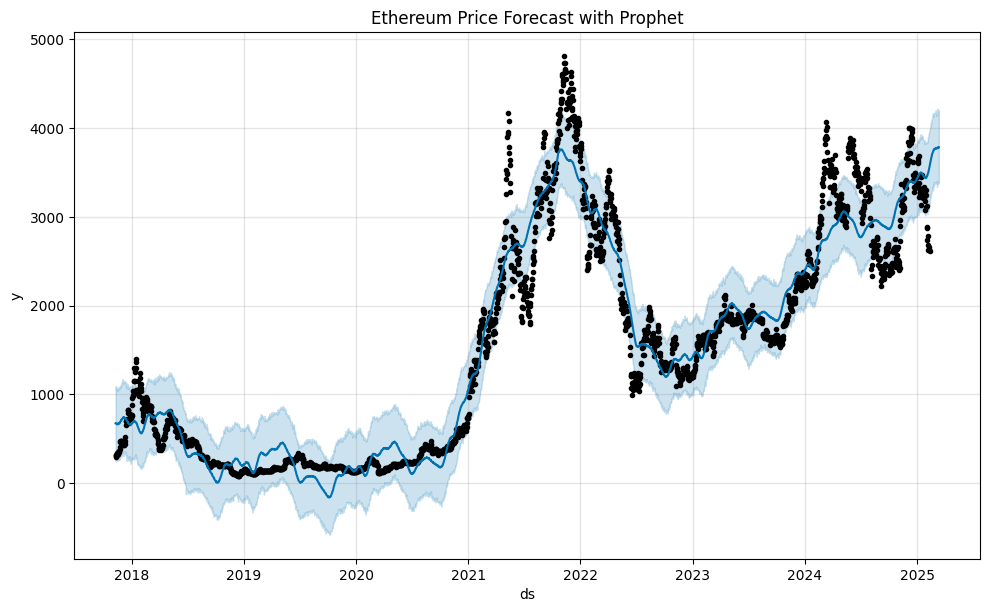

In [ ]:
# Initialize and fit the model
model = Prophet(
    yearly_seasonality=True,   # Capture yearly trends
    weekly_seasonality=True,   # Capture weekly trends
    daily_seasonality=True    # Disable daily (not needed for daily data)
)
model.fit(df_prophet)

# Create future dates (e.g., predict 30 days)
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.title('Ethereum Price Forecast with Prophet')
plt.show()

DEBUG:cmdstanpy:input tempfile: /tmp/tmpcttmhzwe/i6qeqe8v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcttmhzwe/e427vmzc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85857', 'data', 'file=/tmp/tmpcttmhzwe/i6qeqe8v.json', 'init=/tmp/tmpcttmhzwe/e427vmzc.json', 'output', 'file=/tmp/tmpcttmhzwe/prophet_modelfgwue7nd/prophet_model-20250213231055.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:10:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:10:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


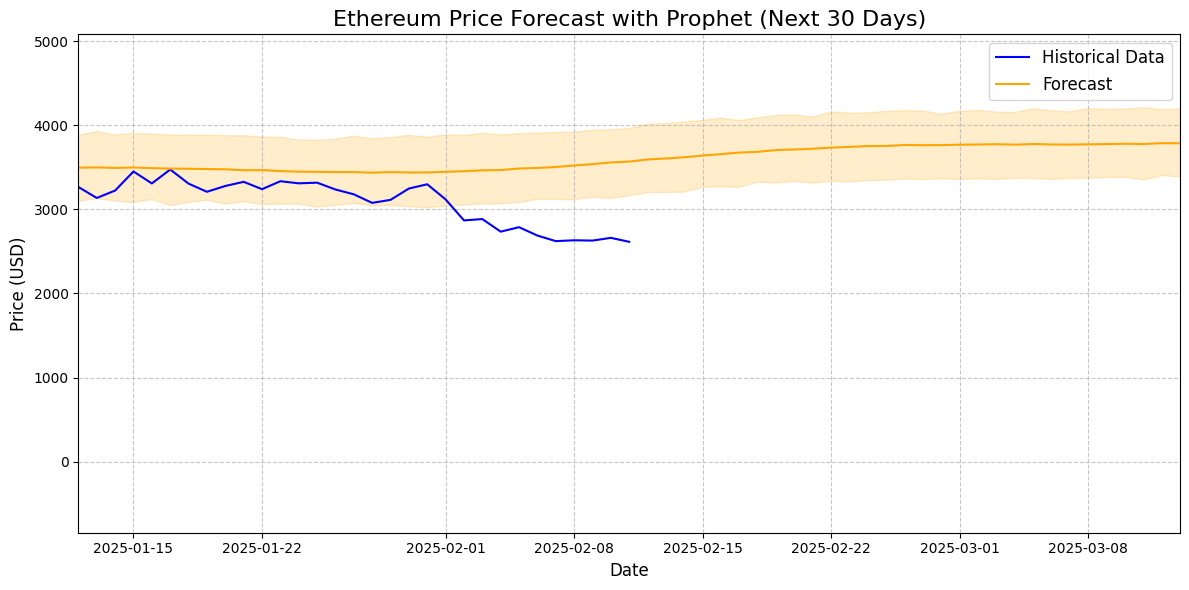

In [ ]:
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

# ... (Your previous code for data loading, preprocessing, etc.)

# Initialize and fit the model
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True
)
model.fit(df_prophet)

# Create future dates for 30 days
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# Plot using Plotly for interactivity (optional)
plot_plotly(model, forecast)

# Or, plot with matplotlib with customizations
fig, ax = plt.subplots(figsize=(12, 6))

# Plot historical data
ax.plot(df_prophet['ds'], df_prophet['y'], label='Historical Data', color='blue')

# Plot forecast with confidence intervals
ax.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='orange')
ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='orange', alpha=0.2)

# Customize the plot
ax.set_title('Ethereum Price Forecast with Prophet (Next 30 Days)', fontsize=16)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Price (USD)', fontsize=12)
ax.legend(fontsize=12)
ax.grid(True, linestyle='--', alpha=0.7)

# Focus on the next 30 days
ax.set_xlim(df_prophet['ds'].max() - pd.DateOffset(days=30), forecast['ds'].max()) # Adjust if needed

plt.tight_layout()
plt.show()

# Optional: Plot components with Plotly for interactivity
# plot_components_plotly(model, forecast)

In [ ]:
# Fit the model on the training data
model.fit(df_prophet)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpravfu91_/zgkxg7rg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpravfu91_/ooglv19p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76921', 'data', 'file=/tmp/tmpravfu91_/zgkxg7rg.json', 'init=/tmp/tmpravfu91_/ooglv19p.json', 'output', 'file=/tmp/tmpravfu91_/prophet_modelj5qop0w7/prophet_model-20250212221626.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:16:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:16:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Create future dates covering the test period
future = model.make_future_dataframe(periods=len(test), freq='D')  # 'D' for daily

# Generate forecasts (includes training + test periods)
forecast = model.predict(future)

# Extract predictions for the test period only
test_forecast = forecast.iloc[-len(test):][['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

In [ ]:
# Merge test data with predictions
results = test.merge(test_forecast, on='ds')

# Calculate evaluation metrics
mse = mean_squared_error(results['y'], results['yhat'])
mae = mean_absolute_error(results['y'], results['yhat'])
rmse = np.sqrt(mse)

print(f"Prophet MSE: {mse:.2f}")
print(f"Prophet MAE: {mae:.2f}")
print(f"Prophet RMSE: {rmse:.2f}")

ValueError: Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.

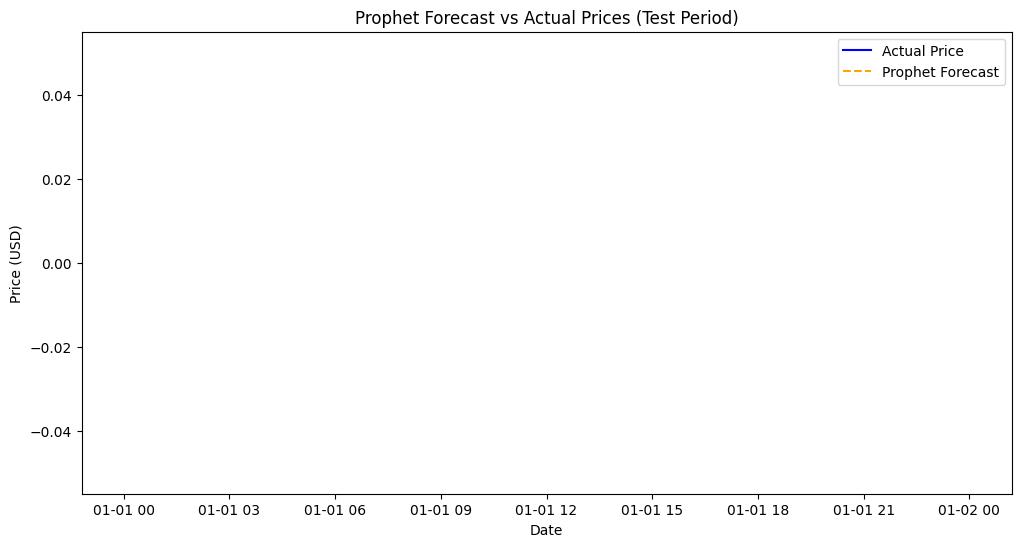

In [ ]:
# Plot actual vs predicted prices
plt.figure(figsize=(12, 6))
plt.plot(results['ds'], results['y'], label='Actual Price', color='blue')
plt.plot(results['ds'], results['yhat'], label='Prophet Forecast', color='orange', linestyle='--')
plt.fill_between(results['ds'], results['yhat_lower'], results['yhat_upper'], alpha=0.2, color='orange')
plt.title('Prophet Forecast vs Actual Prices (Test Period)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

In [ ]:
# Create future dates for the next 7 days
future_7_days = model.make_future_dataframe(periods=7, freq='D')

# Generate forecasts
forecast_7_days = model.predict(future_7_days)

# Extract predictions for the next 7 days
next_7_days = forecast_7_days.tail(7)[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

In [ ]:
# Convert predictions to a numpy array (optional)
predictions_array = next_7_days[['ds', 'yhat']].to_numpy()

# Print predictions
print("Predictions for the Next 7 Days:")
print(next_7_days[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

Predictions for the Next 7 Days:
             ds         yhat   yhat_lower   yhat_upper
2652 2025-02-12  3595.974991  3195.104561  4001.143046
2653 2025-02-13  3610.051416  3220.469015  4007.029401
2654 2025-02-14  3629.371111  3241.761454  4031.319704
2655 2025-02-15  3650.811086  3261.346419  4068.201737
2656 2025-02-16  3665.273563  3231.158646  4087.154589
2657 2025-02-17  3677.527510  3258.346858  4094.398282
2658 2025-02-18  3679.452231  3290.379240  4081.816764


In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30)

,ds,yhat,yhat_lower,yhat_upper
2652,2025-02-12,3593.368745,3189.175483,3992.826716
2653,2025-02-13,3604.840776,3217.313283,4015.756940
2654,2025-02-14,3620.054353,3229.874364,4007.906462
2655,2025-02-15,3639.843428,3226.140009,4068.087522
2656,2025-02-16,3657.113503,3257.370722,4044.440054
2657,2025-02-17,3675.545810,3271.360153,4091.754999
2658,2025-02-18,3684.230179,3292.242999,4100.603359
2659,2025-02-19,3705.322278,3292.516455,4104.011408
2660,2025-02-20,3711.804999,3328.265774,4119.608851
2661,2025-02-21,3720.924144,3343.816044,4164.352947


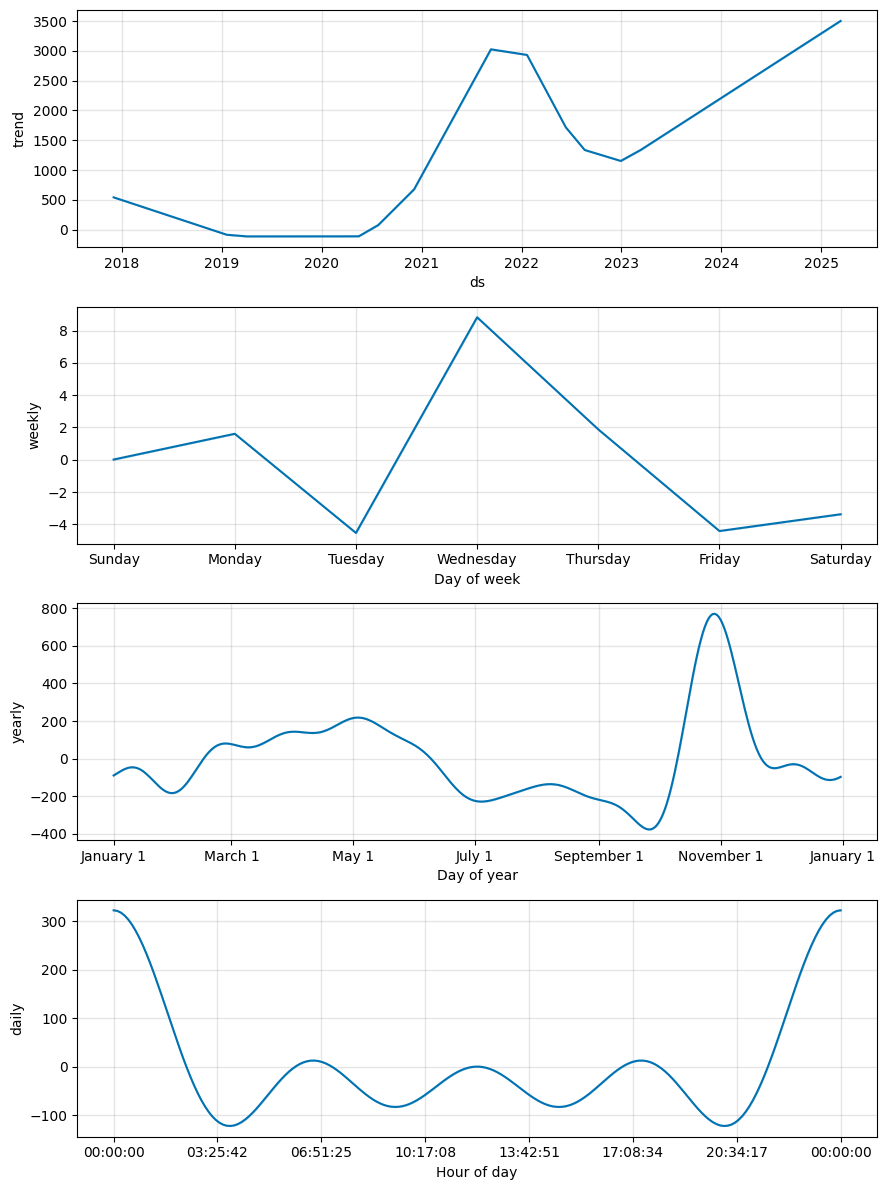

In [ ]:
# Decompose trend, weekly/yearly seasonality
fig2 = model.plot_components(forecast)
plt.show()

#LSTM: multi-step time-series forecasting

In [ ]:
file_path = '/content/drive/MyDrive/odessey_hackathon/DataSet/Eth-USD-2017-2025.csv'

In [ ]:
df = pd.read_csv(file_path)

In [ ]:
 df.isnull().sum()


,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [ ]:
df.shape

(2652, 7)

In [ ]:
cols_to_fix = ["Open", "High", "Low", "Close", "Adj Close", "Volume"]
for col in cols_to_fix:
    df[col] = df[col].replace(",", "", regex=True)  # Remove commas
    df[col] = df[col].replace({"": np.nan, " ": np.nan})  # Ensure NaNs
    df[col] = df[col].astype(float)  # Convert to float after replacing NaNs

In [ ]:
 df.isnull().sum()


,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,1
Volume,0


In [ ]:
df = df.dropna()

In [ ]:
df["Date"] = df["Date"].str.replace("nov\.", "Nov", regex=True)
df["Date"] = df["Date"].str.replace("oct\.", "Oct", regex=True)

<ipython-input-18-6dfbe4b6d8b3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Date"] = df["Date"].str.replace("nov\.", "Nov", regex=True)
<ipython-input-18-6dfbe4b6d8b3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Date"] = df["Date"].str.replace("oct\.", "Oct", regex=True)


In [ ]:
df["Date"] = pd.to_datetime(df["Date"], format="%b %d, %Y")

<ipython-input-19-050a9b7c9254>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Date"] = pd.to_datetime(df["Date"], format="%b %d, %Y")


In [ ]:
df = df.sort_values(by="Date").reset_index(drop=True)

In [ ]:
# Set 'Date' as the index (important for time-series analysis)
df.set_index('Date', inplace=True)

In [ ]:
df[df.duplicated(keep=False)]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [ ]:
df[['Close', 'Adj Close']].corr()

,Close,Adj Close
Close,1.0,1.0
Adj Close,1.0,1.0


In [ ]:
df.drop(columns=['Adj Close'], inplace=True)


In [ ]:
df.shape

(2651, 5)

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(df):
    train, test = df.iloc[train_index], df.iloc[test_index]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Scale the data (include all features and the target)
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train)  # Fit scaler on training data
test_scaled = scaler.transform(test)        # Apply scaler to test data

Modify the create_sequences function to generate sequences where each input sequence predicts the next 7 days

In [ ]:
def create_sequences_multi_step(data, seq_length, pred_length):
    X, y = [], []
    for i in range(len(data) - seq_length - pred_length + 1):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length:i+seq_length+pred_length, 3])  # Predict next 7 days of "Close"
    return np.array(X), np.array(y)

seq_length = 30
pred_length = 7  # Predict 7 days

# Create sequences
X_train, y_train = create_sequences_multi_step(train_scaled, seq_length, pred_length)
X_test, y_test = create_sequences_multi_step(test_scaled, seq_length, pred_length)

In [ ]:
import itertools

# Define hyperparameters to test
param_grid = {
    'units': [32, 50],          # Number of LSTM units
    'seq_length': [14, 30],     # Sequence length
    'batch_size': [16, 32],     # Batch size
    'dropout_rate': [0.2, 0.3]  # Dropout rate
}

# Store results
results = []

# Iterate over all parameter combinations
for params in itertools.product(*param_grid.values()):
    units, seq_length, batch_size, dropout_rate = params

    # Recreate sequences with new seq_length
    X_train, y_train = create_sequences_multi_step(train_scaled, seq_length, pred_length=7)
    X_test, y_test = create_sequences_multi_step(test_scaled, seq_length, pred_length=7)

    # Build model
    model = Sequential()
    model.add(LSTM(units, return_sequences=True, input_shape=(seq_length, X_train.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units))
    model.add(Dropout(dropout_rate))
    model.add(Dense(7))
    model.compile(optimizer='adam', loss='mse')

    # Train model
    history = model.fit(
        X_train, y_train,
        epochs=20,
        batch_size=batch_size,
        validation_data=(X_test, y_test),
        verbose=0  # Disable logging
    )

    # Evaluate
    val_loss = history.history['val_loss'][-1]
    results.append({
        'units': units,
        'seq_length': seq_length,
        'batch_size': batch_size,
        'dropout_rate': dropout_rate,
        'val_loss': val_loss
    })

# Convert results to DataFrame
import pandas as pd
results_df = pd.DataFrame(results)
print("Hyperparameter Tuning Results:")
print(results_df.sort_values('val_loss').head())  # Show top 5 best configurations

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(seq_length, X_train.shape[2])))
model.add(Dropout(0.3))
model.add(LSTM(50, return_sequences=False))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(pred_length))  # Output layer predicts 7 days
model.compile(optimizer='adam', loss='mse')

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_14 (LSTM)                       │ (None, 30, 50)              │          11,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 30, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_15 (LSTM)                       │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 7)                   │             357 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,957 (124.83 KB)

 Trainable params: 31,857 (124.44 KB)

 Non-trainable params: 100 (400.00 B)

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_data=(X_test, y_test),
    callbacks=[EarlyStopping(monitor='val_loss', patience=5)]
)

Epoch 1/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - loss: 0.2462 - val_loss: 0.1672
Epoch 2/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - loss: 0.0261 - val_loss: 0.1371
Epoch 3/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.0161 - val_loss: 0.1037
Epoch 4/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0121 - val_loss: 0.0673
Epoch 5/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0111 - val_loss: 0.0207
Epoch 6/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0101 - val_loss: 0.0138
Epoch 7/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - loss: 0.0090 - val_loss: 0.0066
Epoch 8/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - loss: 0.0090 - val_loss: 0.0062
Epoch 9/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - loss: 0.0088 - val_loss: 0.0101
Epoch 10/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0070 - val_loss: 0.0052
Epoch 11/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - loss: 0.0082 - val_loss: 0.0087
Epoch 12/50
136/136 ━━━━━━━━━━━━━━━━━━━━

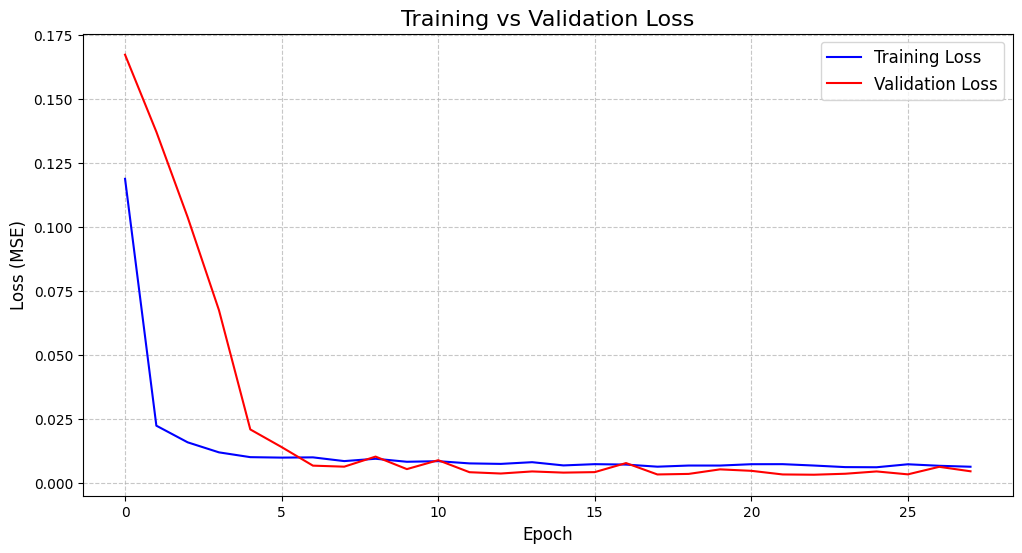

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title('Training vs Validation Loss', fontsize=16)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss (MSE)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.show()

In [ ]:
# Get the last sequence from the test data
last_sequence = test_scaled[-seq_length:]

# Predict next 7 days
predictions_scaled = model.predict(last_sequence.reshape(1, seq_length, X_train.shape[2]))

# Reshape predictions to [7, 1]
predictions_scaled = predictions_scaled.reshape(-1, 1)

# Create dummy values for other features (zeros)
dummy_features = np.zeros((predictions_scaled.shape[0], train_scaled.shape[1] - 1))

# Combine predictions with dummy features
X_inverse = np.concatenate([predictions_scaled, dummy_features], axis=1)

# Inverse transform and extract the target (Close price)
predictions = scaler.inverse_transform(X_inverse)[:, 0]

print("Predicted Prices for Next 7 Days (Direct Multi-Step):")
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 626ms/step
Predicted Prices for Next 7 Days (Direct Multi-Step):
[2832.78064063 2690.11246322 2520.56562733 2351.05118453 2465.0196485
 2811.5037331  2473.70353144]


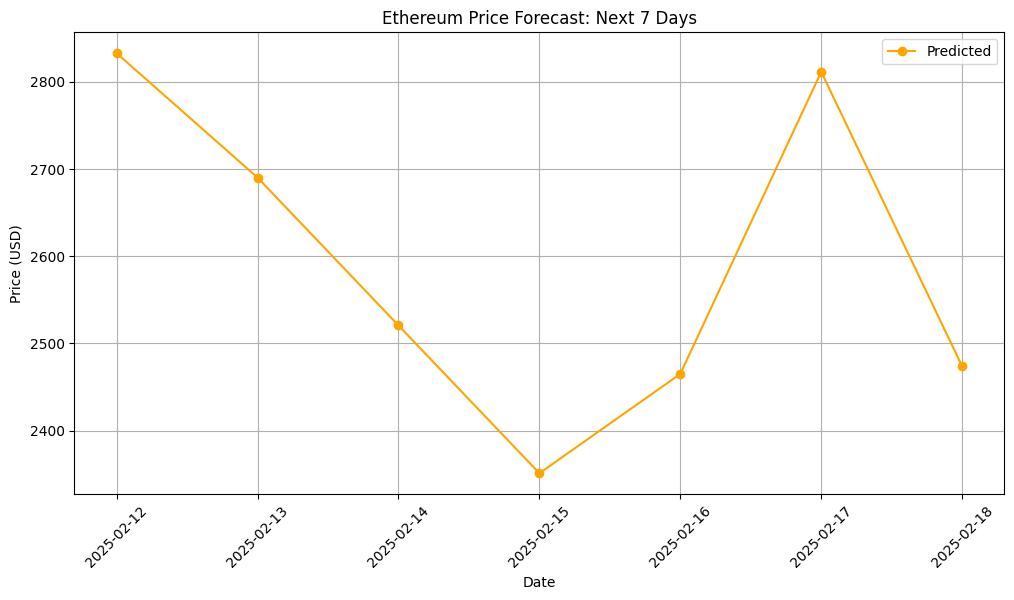

In [ ]:
# Generate dates for the next 7 days
last_date = df.index[-1]
future_dates = pd.date_range(last_date + pd.Timedelta(days=1), periods=7)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(future_dates, predictions, marker='o', label='Predicted', color='orange')
plt.title('Ethereum Price Forecast: Next 7 Days')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# Save your model (Keras model)
model.save("crypto_lstm_model.h5")

# Save your scaler (using joblib or pickle)
import joblib
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']